# Data Preprocessing

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn import metrics
from sklearn.model_selection import cross_val_score, KFold
import warnings

In [5]:
# Create data frame to read dataset
df = pd.read_csv("Medical_insurance.csv")

In [6]:
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
2767,47,female,45.320,1,no,southeast,8569.86180
2768,21,female,34.600,0,no,southwest,2020.17700
2769,19,male,26.030,1,yes,northwest,16450.89470
2770,23,male,18.715,0,no,northwest,21595.38229


In [7]:
# display top 5 rows of the dataset
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [8]:
# display end 5 rows of the dataset
df.tail()

,age,sex,bmi,children,smoker,region,charges
2767,47,female,45.320,1,no,southeast,8569.86180
2768,21,female,34.600,0,no,southwest,2020.17700
2769,19,male,26.030,1,yes,northwest,16450.89470
2770,23,male,18.715,0,no,northwest,21595.38229
2771,54,male,31.600,0,no,southwest,9850.43200


In [9]:
# find shape of our dataset(number of rows and number and columns)
df.shape

(2772, 7)

In [10]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2772 entries, 0 to 2771
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       2772 non-null   int64  
 1   sex       2772 non-null   object 
 2   bmi       2772 non-null   float64
 3   children  2772 non-null   int64  
 4   smoker    2772 non-null   object 
 5   region    2772 non-null   object 
 6   charges   2772 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 151.7+ KB


In [12]:
# describe of numerical columns
df.describe()

,age,bmi,children,charges
count,2772.000000,2772.000000,2772.000000,2772.000000
mean,39.109668,30.701349,1.101732,13261.369959
std,14.081459,6.129449,1.214806,12151.768945
min,18.000000,15.960000,0.000000,1121.873900
25%,26.000000,26.220000,0.000000,4687.797000
50%,39.000000,30.447500,1.000000,9333.014350
75%,51.000000,34.770000,2.000000,16577.779500
max,64.000000,53.130000,5.000000,63770.428010


# Data Visualization

C:\Users\nikam\anaconda3codding\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


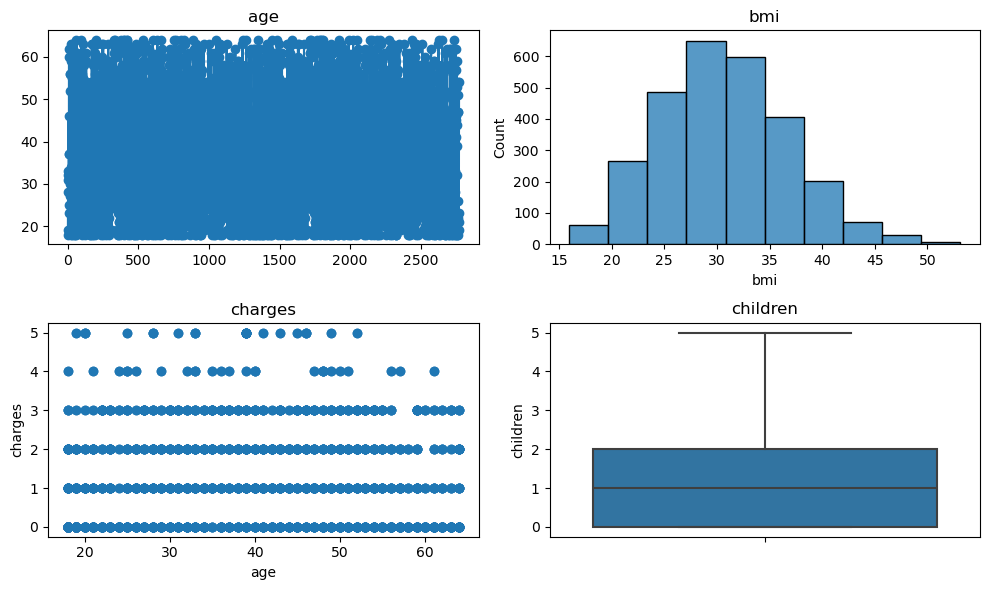

In [13]:
plt.figure(figsize=(10, 6))

plt.subplot(2, 2, 1)
plt.plot(df['age'], marker='o', linestyle='-')
plt.title('age')

plt.subplot(2, 2, 2)
sns.histplot(df['bmi'], bins=10)
plt.title('bmi')

plt.subplot(2, 2, 3)
plt.scatter(df['age'], df['children'], marker='o')
plt.xlabel('age')
plt.ylabel('charges')
plt.title('charges')

plt.subplot(2, 2, 4)
sns.boxplot(y=df['children'])
plt.title('children')

plt.tight_layout()
plt.show()

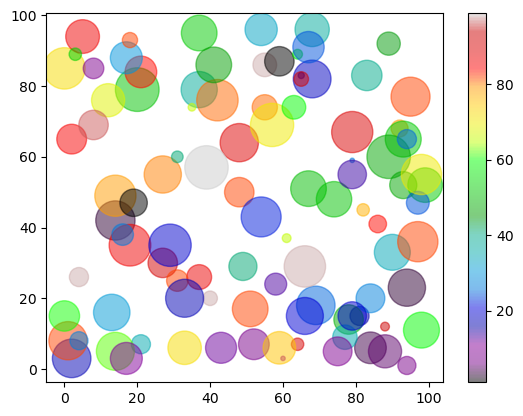

In [15]:
import matplotlib.pyplot as plt
import numpy as np

x = np.random.randint(100, size=(100))
y = np.random.randint(100, size=(100))
colors = np.random.randint(100, size=(100))
sizes = 10 * np.random.randint(100, size=(100))

plt.scatter(x, y, c=colors, s=sizes, alpha=0.5,
            cmap='nipy_spectral')
plt.colorbar()
plt.show()

# convert into classification to numerical¶

In [16]:
df['smoker'].value_counts()

smoker
no     2208
yes     564
Name: count, dtype: int64

In [17]:
df['region'].value_counts()

region
southeast    766
southwest    684
northwest    664
northeast    658
Name: count, dtype: int64

In [18]:
df.replace({'sex':{'male':0,'female':1}},inplace=True)
df.replace({'smoker':{'yes':0,'no':1}},inplace=True)
df.replace({'region':{'southeast':0,'southwest':1,'northwest':2,'northeast':3}},inplace=True)

In [19]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,1,27.900,0,0,1,16884.92400
1,18,0,33.770,1,1,0,1725.55230
2,28,0,33.000,3,1,0,4449.46200
3,33,0,22.705,0,1,2,21984.47061
4,32,0,28.880,0,1,2,3866.85520


# using correlation

In [20]:
correlation = df.corr()

<Axes: >

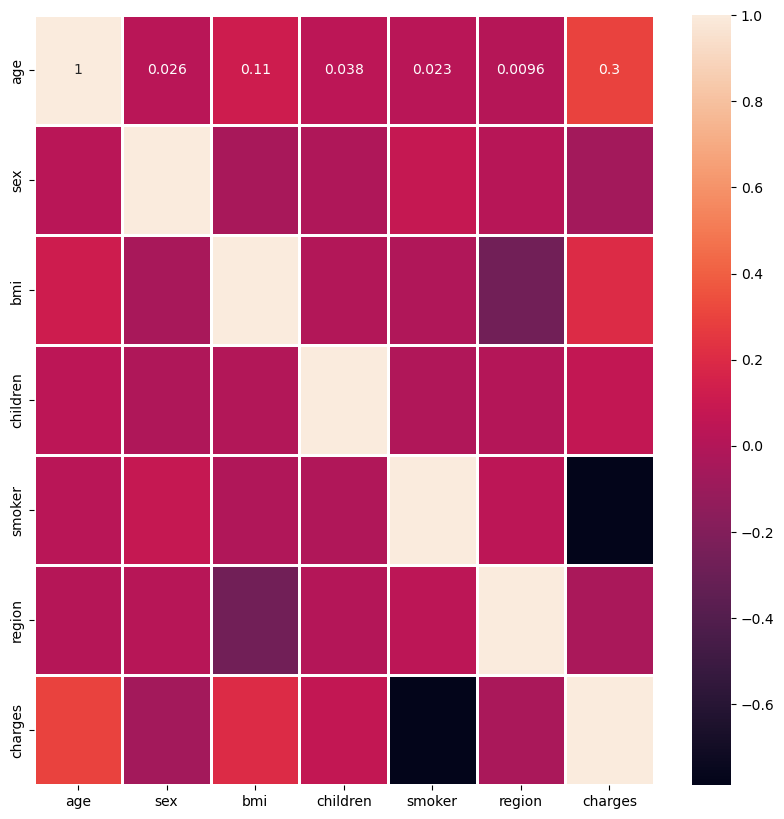

In [21]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(),annot=True,linewidths=2)

# train test split

In [22]:
x = df.drop('charges', axis=1)
y = df['charges']

In [23]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.1, random_state=42)

In [24]:
x_train.shape

(2494, 6)

In [25]:
x_test.shape

(278, 6)

In [26]:
lg = LinearRegression()
lg.fit(x_train,y_train) # so model will be train
y_pred = lg.predict(x_test)# 10 model will be predicted

In [27]:
y_pred

array([10252.37003392, 36925.63699247,  9242.58030653,  6095.56887906,
        6498.52307519, 34140.83432712,  5889.4690635 , 39199.1850534 ,
       11857.41649888,  3306.14631589, 13026.61010124, 12811.55228475,
        5116.4016545 , 11212.95057807,  4025.98890266,  8029.72457501,
       10031.88005226,  9560.02736626,  5003.56259867,  3764.18283654,
       12722.33848571, 33168.36724467, 30684.85821089, 40037.14334607,
       27492.903502  ,  9337.30443023, -1491.43449478, 16716.42294067,
        8378.08682421,  -599.5211043 , 14211.43879366,  3631.84568848,
        2781.10991561,  2121.11163781, 14747.84881671, 11803.35166863,
        1610.28192142,  2185.82473035,  8385.27996477, 32106.56450089,
        6054.59153877,  9613.47836161, 14360.78099081,  7064.09793246,
         136.54890409, 40531.96013987,  4290.60626465, 35517.14030696,
        5448.89433824,  6960.39101441, 36153.25897426,  9626.93175239,
        3287.31769738,  9952.57573603,  6378.16095196, 12180.55270262,
      

In [28]:
y_test

1106     8988.15875
1321    28101.33305
2313    12032.32600
2274     1682.59700
1432     3393.35635
           ...     
87      11073.17600
1376    26018.95052
2129     3757.84480
2284     1634.57340
432      5969.72300
Name: charges, Length: 278, dtype: float64

# Feature Scaling¶

In [29]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
scaler = StandardScaler()

In [30]:
scaler.fit(x)

StandardScaler()

# ML models

# Linear Regression

In [31]:
lr = LinearRegression()

In [32]:
lr.fit(x_train,y_train)

LinearRegression()

In [33]:
lr.coef_

array([ 2.56696824e+02, -1.29213384e+01,  3.25899650e+02,  4.97997130e+02,
       -2.40165454e+04,  3.59397390e+02])

In [34]:
lr.intercept_

11232.35057270161

# Decision Tree regression

In [35]:
regressor=DecisionTreeRegressor(criterion='squared_error')
regressor.fit(x_train,y_train)

DecisionTreeRegressor()

In [36]:
regressor.score(x_test,y_test)

0.994321619854304

# random forest regression

In [37]:
Regressor=RandomForestRegressor(n_estimators=100,criterion='squared_error')
Regressor.fit(x_train,y_train)

RandomForestRegressor()

In [38]:
Regressor.score(x_test,y_test)

0.9715508896965619

In [39]:
cv = KFold(n_splits=5, random_state=50, shuffle=True)

In [40]:
y_pred = lr.predict(x_test)
y_pred

array([10252.37003392, 36925.63699247,  9242.58030653,  6095.56887906,
        6498.52307519, 34140.83432712,  5889.4690635 , 39199.1850534 ,
       11857.41649888,  3306.14631589, 13026.61010124, 12811.55228475,
        5116.4016545 , 11212.95057807,  4025.98890266,  8029.72457501,
       10031.88005226,  9560.02736626,  5003.56259867,  3764.18283654,
       12722.33848571, 33168.36724467, 30684.85821089, 40037.14334607,
       27492.903502  ,  9337.30443023, -1491.43449478, 16716.42294067,
        8378.08682421,  -599.5211043 , 14211.43879366,  3631.84568848,
        2781.10991561,  2121.11163781, 14747.84881671, 11803.35166863,
        1610.28192142,  2185.82473035,  8385.27996477, 32106.56450089,
        6054.59153877,  9613.47836161, 14360.78099081,  7064.09793246,
         136.54890409, 40531.96013987,  4290.60626465, 35517.14030696,
        5448.89433824,  6960.39101441, 36153.25897426,  9626.93175239,
        3287.31769738,  9952.57573603,  6378.16095196, 12180.55270262,
      

In [41]:
y_test

1106     8988.15875
1321    28101.33305
2313    12032.32600
2274     1682.59700
1432     3393.35635
           ...     
87      11073.17600
1376    26018.95052
2129     3757.84480
2284     1634.57340
432      5969.72300
Name: charges, Length: 278, dtype: float64

# cross validation

In [42]:
cv = KFold(n_splits=5 , random_state=50, shuffle=True)

In [43]:
#for Random forest regressor
cross_val_score(estimator=Regressor ,X=x, y = y ,cv = cv)

array([0.95324463, 0.94301825, 0.94177159, 0.9514305 , 0.92648807])

In [44]:
y_predict = lr.predict(x_test)
y_predict

array([10252.37003392, 36925.63699247,  9242.58030653,  6095.56887906,
        6498.52307519, 34140.83432712,  5889.4690635 , 39199.1850534 ,
       11857.41649888,  3306.14631589, 13026.61010124, 12811.55228475,
        5116.4016545 , 11212.95057807,  4025.98890266,  8029.72457501,
       10031.88005226,  9560.02736626,  5003.56259867,  3764.18283654,
       12722.33848571, 33168.36724467, 30684.85821089, 40037.14334607,
       27492.903502  ,  9337.30443023, -1491.43449478, 16716.42294067,
        8378.08682421,  -599.5211043 , 14211.43879366,  3631.84568848,
        2781.10991561,  2121.11163781, 14747.84881671, 11803.35166863,
        1610.28192142,  2185.82473035,  8385.27996477, 32106.56450089,
        6054.59153877,  9613.47836161, 14360.78099081,  7064.09793246,
         136.54890409, 40531.96013987,  4290.60626465, 35517.14030696,
        5448.89433824,  6960.39101441, 36153.25897426,  9626.93175239,
        3287.31769738,  9952.57573603,  6378.16095196, 12180.55270262,
      

# SVR(support vector regression)

In [46]:
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.svm import SVR
from sklearn import metrics

In [47]:
# mse rmse & re_score
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print('MSE = ', mse)
print('RMSE = ', rmse)

MSE =  42307759.59541855
RMSE =  6504.441528326513


In [48]:
r2_score(y_test,y_pred)

0.7216970113368688

In [49]:
from sklearn.neighbors import KNeighborsRegressor
knn = KNeighborsRegressor(n_neighbors=5)

In [50]:
len(x_train)

2494

In [51]:
len(x_test)

278

# KNN (k-nearest neighbour)

In [52]:
knn.fit(x_train, y_train)

KNeighborsRegressor()

In [53]:
knn.score(x_test,y_test)

0.42737768377679797